In [1]:
#@title loading helpful packages

import numpy as np     
import pandas as pd

## Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data_file_path = 'Jan-24 project.csv'

# loading data as pandas dataframe
df = pd.read_csv(data_file_path)

In [3]:
#look at data
pd.DataFrame(df)

,product_id,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,availability_status,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,In Stock,7,Spring,Yes,0.658145,Individual,Female
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",In Stock,54,Winter,No,4.734585,Bundle,Female
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",In Stock,31,Winter,No,2.024140,Bundle,Female
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,In Stock,49,Spring,No,3.869239,Individual,Other
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,In Stock,74,Winter,Yes,0.812489,Individual,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,In Stock,75,Autumn,Yes,1.992988,Bundle,Other
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,In Stock,65,Autumn,No,2.893314,Bundle,Female
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,In Stock,61,Autumn,Yes,3.644294,Individual,Female
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",In Stock,7,Summer,No,4.540101,Individual,Other


In [4]:
# concise Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              27555 non-null  int64  
 1   product_title           27554 non-null  object 
 2   category                27555 non-null  object 
 3   product_subcategory     27555 non-null  object 
 4   brand                   27554 non-null  object 
 5   selling_price           27555 non-null  float64
 6   original_price          27555 non-null  float64
 7   product_type            27555 non-null  object 
 8   product_rating          18929 non-null  float64
 9   product_description     27440 non-null  object 
 10  availability_status     27555 non-null  object 
 11  customer_reviews_count  27555 non-null  int64  
 12  seasonal_indicator      27555 non-null  object 
 13  promotion_indicator     27555 non-null  object 
 14  shipping_weight         27555 non-null

In [5]:
# check for missing values
print(df.isnull().sum())

product_id                   0
product_title                1
category                     0
product_subcategory          0
brand                        1
selling_price                0
original_price               0
product_type                 0
product_rating            8626
product_description        115
availability_status          0
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64


In [6]:
# check for unique values
for col in df.columns:
    print(f"Feature: {col}, DType: {df[col].dtype}")
    print(f"# of unique values = {df[col].nunique()}")
    print("")

Feature: product_id, DType: int64
# of unique values = 27555

Feature: product_title, DType: object
# of unique values = 23540

Feature: category, DType: object
# of unique values = 11

Feature: product_subcategory, DType: object
# of unique values = 90

Feature: brand, DType: object
# of unique values = 2313

Feature: selling_price, DType: float64
# of unique values = 3256

Feature: original_price, DType: float64
# of unique values = 1348

Feature: product_type, DType: object
# of unique values = 426

Feature: product_rating, DType: float64
# of unique values = 40

Feature: product_description, DType: object
# of unique values = 21944

Feature: availability_status, DType: object
# of unique values = 1

Feature: customer_reviews_count, DType: int64
# of unique values = 101

Feature: seasonal_indicator, DType: object
# of unique values = 4

Feature: promotion_indicator, DType: object
# of unique values = 2

Feature: shipping_weight, DType: float64
# of unique values = 27555

Feature: bu

#### Identify redundant columns/features

#### No uniqueness
- `availability_status` $\rightarrow$ "In Stock"

#### Large number of unique values
- `product_id` $\rightarrow$ all are sequential values

In [7]:
data = df.drop(columns = ['product_id', 'availability_status'])

#### Drop rows with features having less missing values

In [8]:
data = data.dropna(subset=['brand', 'product_title'])

In [9]:
print(data.isnull().sum())

product_title                0
category                     0
product_subcategory          0
brand                        0
selling_price                0
original_price               0
product_type                 0
product_rating            8625
product_description        114
customer_reviews_count       0
seasonal_indicator           0
promotion_indicator          0
shipping_weight              0
bundle_indicator             0
customer_demographics        0
dtype: int64


#### Impute missing values in `product_rating`

In [10]:
# fill the missing values with median of brand
data['product_rating'] = data.groupby('brand')['product_rating'].transform(lambda x: x.fillna(x.median()))

In [11]:
data['product_rating'].isnull().sum()

1609

In [12]:
# fill the remaining missing values with median of category
data['product_rating'] = data.groupby('category')['product_rating'].transform(lambda x: x.fillna(x.median()))

In [13]:
data['product_rating'].isnull().sum()

0

/home/sagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sagar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


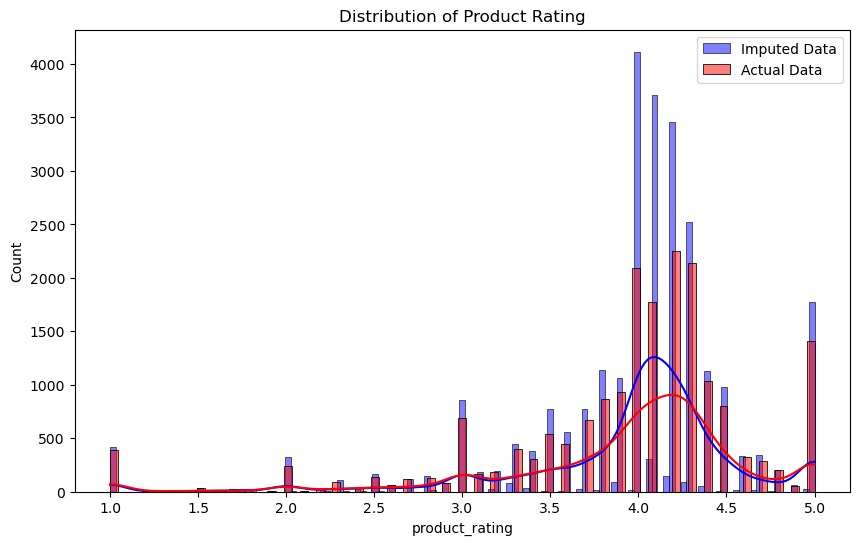

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['product_rating'], kde=True, color='blue', label='Imputed Data')
sns.histplot(df['product_rating'], kde=True, color='red', label='Actual Data')
plt.title('Distribution of Product Rating')
plt.legend()
plt.show();

#### Creating new feature
- `discount_offered` = 100 * (`selling_price` - `original_price`)/`original_price`

In [15]:
data['discount_offered'] = (100 * (data['original_price'] - data['selling_price'])/data['original_price']).round(2)

In [16]:
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00


#### New feature as `brand_scale` which indicate brands based on number of products

- `high`

- `medium`

- `low`

In [17]:
brand_products_count = data['brand'].value_counts()
brand_products_count = brand_products_count.reset_index()
brand_products_count.head(10)

,brand,count
0,Fresho,638
1,bb Royal,539
2,BB Home,428
3,DP,250
4,Fresho Signature,171
5,bb Combo,168
6,Amul,153
7,INATUR,146
8,Himalaya,141
9,Dabur,138


In [18]:
fig = px.box(brand_products_count, y='count', title='Brand Products Count Distribution', height=600,width=400)
fig.show();

In [19]:
# count the number of brands having count less than 120
brand_products_count_less_than_12 = brand_products_count[brand_products_count['count'] < 12]
print(f"# of brands having count less than 12 = \t{brand_products_count_less_than_12.shape[0]}", "\t=>\t`low` scale")
brand_products_count_less_than_110 = brand_products_count[(brand_products_count['count'] < 110) & (brand_products_count['count'] >= 12 )]
print(f"# of brands having count less than 110 = \t{brand_products_count_less_than_110.shape[0]}", "\t=>\t`medium` scale")
brand_products_count_gret_than_110 = brand_products_count[brand_products_count['count'] > 110]
print(f"# of brands having count greater than 110 = \t{brand_products_count_gret_than_110.shape[0]}", "\t=>\t`high` scale")

# of brands having count less than 12 = 	1709 	=>	`low` scale
# of brands having count less than 110 = 	589 	=>	`medium` scale
# of brands having count greater than 110 = 	15 	=>	`high` scale


In [20]:
# map these brand_products_count to each brand in the data in new column brand_products_count
data = data.merge(brand_products_count, on='brand', how='left')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,count
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,12
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,58
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,42
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,103
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,87


In [21]:
# create a new column brand_scale based on the count column, if the count is less than 12 then the value will be 'low', elif the count is greater than 12 and less than 110 then the value will be 'medium' else 'high'
data['brand_scale'] = data['count'].apply(lambda x: 'low' if x < 12 else 'medium' if (x < 110 and x >= 12) else 'high')

In [22]:
scale = {s:0 for s in ['high', 'medium', 'low']}
cross_check_scale = data.groupby(['brand_scale', 'brand']).groups
for (s, _) in cross_check_scale.keys():
    if s == "high":
        scale['high'] += 1
    if s == "medium":
        scale['medium'] += 1
    if s == "low":
        scale['low'] += 1
print(scale)

{'high': 15, 'medium': 589, 'low': 1709}


In [23]:
data = data.drop(columns='count')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium


In [24]:
# data.to_csv('../my_data.csv', index=False)

In [25]:
data['products_sold'] = ((data['customer_reviews_count'] * (1 + (data['product_rating']/5))).round()).astype('int64')
data.head()

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale,products_sold
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium,13
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium,79
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium,52
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium,85
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium,139


In [26]:
data['revenue'] = data['selling_price'] * data['products_sold']
data

,product_title,category,product_subcategory,brand,selling_price,original_price,product_type,product_rating,product_description,customer_reviews_count,seasonal_indicator,promotion_indicator,shipping_weight,bundle_indicator,customer_demographics,discount_offered,brand_scale,products_sold,revenue
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,7,Spring,Yes,0.658145,Individual,Female,0.00,medium,13,2860.00
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",54,Winter,No,4.734585,Bundle,Female,0.00,medium,79,14220.00
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",31,Winter,No,2.024140,Bundle,Female,52.40,medium,52,6188.00
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,49,Spring,No,3.869239,Individual,Other,15.34,medium,85,12665.00
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,74,Winter,Yes,0.812489,Individual,Male,0.00,medium,139,22518.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27548,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,75,Autumn,Yes,1.992988,Bundle,Other,20.00,medium,134,26692.80
27549,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,65,Autumn,No,2.893314,Bundle,Female,10.00,medium,117,7897.50
27550,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,61,Autumn,Yes,3.644294,Individual,Female,0.00,medium,107,21400.00
27551,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",7,Summer,No,4.540101,Individual,Other,20.00,medium,13,5148.00


In [27]:
test = pd.DataFrame(data.groupby([data['category'], data['brand']], as_index=False)['revenue'].sum())
# test.to_csv('../test_file.csv', index=True)
test

,category,brand,revenue
0,Baby Care,1st Bites,39225.00
1,Baby Care,Amul,61940.00
2,Baby Care,Aptamil,124410.00
3,Baby Care,Aveeno,164401.00
4,Baby Care,BIOTIQUE,13290.75
...,...,...,...
2775,Snacks & Branded Foods,bb Popular,1015.00
2776,Snacks & Branded Foods,bb Royal,325839.08
2777,Snacks & Branded Foods,iD,7070.00
2778,Snacks & Branded Foods,iD Fresho,64532.52


In [28]:
data[data['category']=="Baby Care"]['revenue'].sum()

29195550.15

In [29]:
unique_categories = data['category'].unique()
print(len(unique_categories))
for cat in unique_categories:
    print(f"category = {cat}")
    temp_df = test[test['category']==cat].sort_values(by="revenue", ascending=False)[['brand', 'revenue']]
    total = temp_df['revenue'].sum()
    temp_df['market_share'] = round(100*(temp_df['revenue']/total), 2)
    print(temp_df)
    plt.pie(temp_df)
    print(f"total revenue in category = {round(total, 2)}")
    # print(temp_df['market_share'].describe())
    print("\n\n\n")

11
category = Beauty & Hygiene
              brand     revenue  market_share
312            Dkny  9210980.00          3.15
168           Ajmal  7213245.88          2.47
704      StBotanica  5426750.00          1.86
425         INATUR   5386493.50          1.84
726   The Face Shop  4710898.60          1.61
..              ...         ...           ...
717    Swiss Beauty      448.20          0.00
493           Livon      432.00          0.00
707      Strawberry      350.00          0.00
443  Johnson's baby       56.10          0.00
705       SterloMax        0.00          0.00

[644 rows x 3 columns]
total revenue in category = 292294619.67
count    644.000000
mean       0.154922
std        0.296434
min        0.000000
25%        0.010000
50%        0.040000
75%        0.170000
max        3.150000
Name: market_share, dtype: float64




category = Kitchen, Garden & Pets
            brand      revenue  market_share
2354     Prestige  11148187.00          7.01
2194      BB Home   7706417.0